In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
import torch
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
oppScrData = pd.read_excel ('/Users/sanyamkakkar/Desktop/Spring/Ml760/CS760-Project/OppScrData.xlsx')

In [50]:
def normalize_ss(data):
  return StandardScaler().fit_transform(data)

def normalize_min_max(data):
    n = data.shape[1]    
    for i in range(n-1):
      data[:,i] = (data[:,i] - np.min(data[:,i]))/(np.max(data[:,i])- np.min(data[:,i]))
    return data

def plot_results(y_test, y_pred):
  plt.figure()
  y_test_sub, y_pred_sub = y_test, y_pred
  if len(y_test)>200:
    y_test_sub, y_pred_sub = y_test[::1], y_pred[::1]
    
  x = [i+1 for i in range(len(y_test_sub))]
  plt.plot((x,x),([i for i in y_pred_sub], [j for j in y_test_sub]),c='green',markevery=5,)
  plt.scatter(x, y_pred_sub, label="predicted_y")
  plt.scatter(x, y_test_sub, label="actual_y")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()

def mean_absolute_error(actual, predictions):
  n = len(actual)
  return sum(abs(actual - predictions))/n

In [42]:
def get_dead_people_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[['Age at CT', 'DEATH [d from CT]','Sex', "L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)']]
    n = ct_data.shape[0]
    dead_people_ct_data = []

    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break          

        if (not ignore) and (not pd.isna(row['DEATH [d from CT]'])):
          row[0] = (row['Age at CT']*365 + row['DEATH [d from CT]']) - ((76.1*365) if row['Sex'] == "Male" else (81.1*365)          )
          dead_people_ct_data.append(row)

    dead_people_ct_data = np.array(dead_people_ct_data)
    dead_people_ct_data = np.delete(dead_people_ct_data, 1, 1)
    dead_people_ct_data = np.delete(dead_people_ct_data, 1, 1)
    return np.array(dead_people_ct_data, dtype=np.float32)

# dead_people_ct_data[0] -> number of days lost
# dead_people_ct_data[1:] -> ct_data



In [37]:
dead_people_ct_data = get_dead_people_ct_data(oppScrData)

<ipython-input-36-12190a7316c1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[0] = (row['Age at CT']*365 + row['DEATH [d from CT]']) - ((76.1*365) if row['Sex'] == "Male" else (81.1*365)          )


In [6]:
y = dead_people_ct_data[:,0]
# X = normalize_ss(dead_people_ct_data[:,1:])
# X = normalize_min_max(dead_people_ct_data[:,1:])
X = dead_people_ct_data[:,1:]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

0.081233395863205


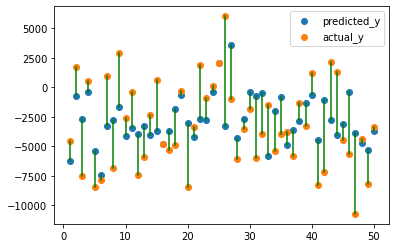

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))
plot(y_test=y_test, y_pred=y_pred)

3697.9448046875


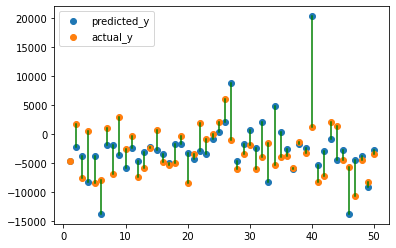

In [8]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(mean_absolute_error(y_test, y_pred))
plot(y_test=y_test, y_pred=y_pred)

In [9]:
def get_all_people_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[['Age at CT', "L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)']]
    n = ct_data.shape[0]
    all_people_ct_data = []

    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break          

        if not ignore:
          all_people_ct_data.append(row)

    return np.array(all_people_ct_data, dtype=np.float32)

# dead_people_ct_data[0] -> biological age
# dead_people_ct_data[1:] -> ct_data

In [10]:
a = get_all_people_ct_data(oppScrData)

In [11]:
days_lost = -lr.predict(poly.fit_transform(a[:,1:]))

In [12]:
a[:,0] = a[:,0]*365 + days_lost

In [13]:
X = a[:, 1:]
X2=a[:, 1:]
y = a[:,0]
y2=a[:,0]/365

In [14]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = StandardScaler()

X_norm=normalize_ss(X)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=2)




X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(X_norm, y2, test_size=0.1, random_state=2)

In [16]:
#Neural with normalization

In [17]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader,IterableDataset
from sklearn.model_selection import train_test_split

In [18]:
class CT_Dataset(Dataset):

    def __init__(self, X, y):
        self.ct_data = X
        self.age = y 

    def __len__(self):
        return len(self.ct_data)

    def __getitem__(self, idx):
        ct_data = self.ct_data[idx]     
        age = np.array(self.age[idx], dtype=np.float32)
        return torch.from_numpy(ct_data), torch.from_numpy(age)

In [19]:
a = CT_Dataset(X=X_norm_train, y = Y_norm_train)
train_set = DataLoader(a, batch_size=64, shuffle=True)

In [20]:
def build_model():
  return nn.Sequential(
    nn.Linear(11, 128),

    nn.Linear(128,64),

    nn.Linear(64, 32), 

    nn.ReLU(),
    nn.Linear(32, 1)
    )

model = build_model()

In [21]:
criterion = nn.MSELoss()

def train_model(model, train_loader, criterion, T):
  model.train()
  opt = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.25)
  #opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  for epoch in range(T): 
      running_loss = 0
      for data in enumerate(train_loader):
          ct_data, actual_age = data[1][0], data[1][1]
        
          opt.zero_grad()
          predicted_age = model(ct_data)      
          loss = criterion(predicted_age, actual_age)
          running_loss += loss.item()*train_loader.batch_size
          loss.backward() 
          opt.step()

  
      print("​Train Epoch: "+str(epoch) + " Loss =", str(running_loss))

  model.train(mode=False)

model = build_model()
train_model(model, train_set, criterion, T = 100)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([54])) that is different to the input size (torch.Size([54, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


​Train Epoch: 0 Loss = 20924253.334960938
​Train Epoch: 1 Loss = 911616.9543457031
​Train Epoch: 2 Loss = 771138.599609375
​Train Epoch: 3 Loss = 761607.6467285156
​Train Epoch: 4 Loss = 758133.6904296875
​Train Epoch: 5 Loss = 760143.4738769531
​Train Epoch: 6 Loss = 756746.4370117188
​Train Epoch: 7 Loss = 759073.4284667969
​Train Epoch: 8 Loss = 756728.3552246094
​Train Epoch: 9 Loss = 760725.197265625
​Train Epoch: 10 Loss = 759053.8916015625
​Train Epoch: 11 Loss = 759651.7211914062
​Train Epoch: 12 Loss = 759268.9970703125
​Train Epoch: 13 Loss = 761140.9030761719
​Train Epoch: 14 Loss = 760634.4855957031
​Train Epoch: 15 Loss = 759112.8835449219
​Train Epoch: 16 Loss = 761756.6540527344
​Train Epoch: 17 Loss = 760481.5584716797
​Train Epoch: 18 Loss = 761664.2667236328
​Train Epoch: 19 Loss = 759204.869140625
​Train Epoch: 20 Loss = 762607.2446289062
​Train Epoch: 21 Loss = 760675.5478515625
​Train Epoch: 22 Loss = 767243.9072265625
​Train Epoch: 23 Loss = 761098.6506347656
​Tra

In [22]:
b = CT_Dataset(X=X_norm_test, y = Y_norm_test)
test_set = DataLoader(b, batch_size=32)
test_set

In [23]:
def evaluate_model(model, test_loader, criterion):
  model.eval()
  running_loss = 0
  with torch.no_grad():
    for data in enumerate(test_loader):
          ct_data, actual_age = data[1][0], data[1][1]
          predicted_age = model(ct_data)
          loss = criterion(predicted_age, actual_age)
          running_loss += loss.item()
    
  return running_loss

evaluate_model(model, test_set, criterion)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


2256.905921936035

In [24]:
predict=model(torch.tensor(X_norm_test))

In [25]:
preict_np=predict.detach().numpy()

In [26]:
Mse = mean_squared_error(Y_norm_test , preict_np
                         )
error=mean_absolute_error(Y_norm_test , preict_np)
mape=mean_absolute_percentage_error(Y_norm_test , preict_np)
print("RMSE: %.2f" % (Mse**(1/2.0)))
print("MApe: %.2f" %(mape))
print("error",np.mean(error))

RMSE: 8.88
MApe: 0.10
error 6.2630916


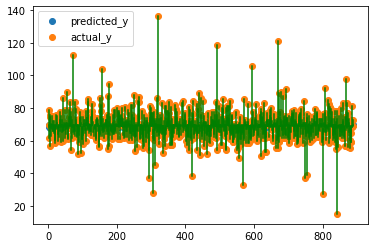

In [51]:
plot(y_test=Y_norm_test, y_pred=preict_np)